# Load prepared panel data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
 
    
df_panel = pd.read_csv('panel_data_all_with_flu_rate.csv')
df_merged = pd.read_csv('df_merged.csv')
# df_merged = df_merged[df_merged['avg_users'] > 1000].reset_index(drop=True) #22
df_merged = df_merged[df_merged['user_rate'] > 0.5].reset_index(drop=True) #37
ciyt_list = df_merged['Country-city'].tolist()
print(ciyt_list)

# 强制转为数值，清理脏数据
df_panel['pm25'] = pd.to_numeric(df_panel['pm25'], errors='coerce')
df_panel['cough_rate'] = pd.to_numeric(df_panel['cough_rate'], errors='coerce')

# 删除缺失值
df_panel = df_panel.dropna(subset=['cough_rate', 'pm25', 'city', 'country'])

# 转换为 datetime 类型（必须）
df_panel['date'] = pd.to_datetime(df_panel['date'], errors='coerce')
# 删除指定日期区间的数据
df_panel = df_panel[~((df_panel['date'] >= "2024-04-20") & (df_panel['date'] <= "2024-04-23"))]
df_panel['label'] = df_panel['country'] + '-' + df_panel['city']

# 提取城市
cities =  df_panel['label'].tolist()
ciyt_list = list(set(ciyt_list) & set(cities))
ciyt_list = sorted(ciyt_list)
print(len(ciyt_list))

df_panel = df_panel[df_panel['label'].isin(ciyt_list)]

['Australia-Brisbane', 'Australia-Melbourne', 'Australia-Sydney', 'Brazil-Sao Paulo', 'Chile-Santiago', 'China-Beijing', 'China-Chengdu', 'China-Hangzhou', 'China-Shanghai', 'France-Paris', 'Germany-Berlin', 'Germany-Leipzig', 'Italy-Bergamo', 'Italy-Florence', 'Italy-Milano', 'Italy-Monza and Brianza', 'Italy-Rome', 'Japan-Osaka', 'Japan-Tokyo', 'South Africa-City of Cape Town', 'South Africa-City of Johannesburg', 'Sweden-Uppsala', 'United Kingdom-Birmingham', 'United Kingdom-Cambridgeshire', 'United Kingdom-London', 'United Kingdom-Oxfordshire', 'United States-Chicago', 'United States-Columbus', 'United States-Los Angeles', 'United States-New York', 'United States-Phoenix', 'United States-Pittsburgh', 'United States-Saint Louis', 'United States-Salt Lake']
34


In [2]:
ciyt_list
len(ciyt_list)

34

In [3]:
# Nature-style 图像设置
plt.rcParams.update({
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 9,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7
})


# Supplementary Figure 1. Time Series Data

C:\Users\xiato\AppData\Local\Temp\ipykernel_17888\1306209268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['pm25'] = pd.to_numeric(df_city['pm25'], errors='coerce')


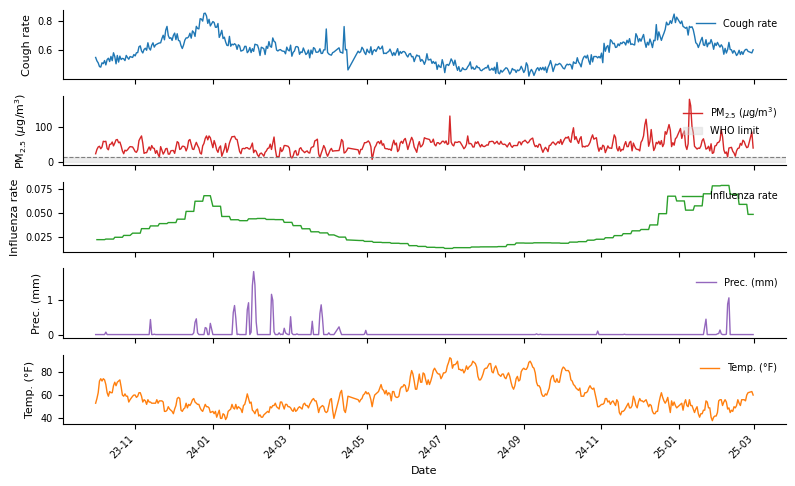

In [4]:
df = df_panel.copy()
df_city = df[df["city"] == 'Los Angeles']
df_city['pm25'] = pd.to_numeric(df_city['pm25'], errors='coerce')

# 设置变量
variables = ["cough_rate", "pm25", "flu_rate", "PRCP", "TAVG"]
labels = [
    "Cough rate",
    "PM$_{2.5}$ ($\mu$g/m$^3$)",
    "Influenza rate",
    "Prec. (mm)",
    "Temp. (°F)"
]
colors = ["#1f77b4", "#d62728", "#2ca02c", "#9467bd", "#ff7f0e"]

# 设置紧凑字体和样式
plt.rcParams.update({
    "font.size": 8,
    "axes.titlesize": 9,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "xtick.direction": "out",
    "ytick.direction": "out"
})

# 控制图像宽度适合单栏（1 inch ≈ 2.54 cm）
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 5), sharex=True)

for i, var in enumerate(variables):
    axes[i].plot(df_city["date"], df_city[var], color=colors[i], linewidth=1.0, label=labels[i])

    if var == "pm25":
        axes[i].axhspan(0, 15, color="lightgray", alpha=0.4, label="WHO limit")
        axes[i].axhline(15, color="gray", linestyle="--", linewidth=0.8)

    axes[i].set_ylabel(labels[i], fontsize=8)
    axes[i].legend(loc='upper right', frameon=False, fontsize=7)
    axes[i].grid(False)

# 时间轴设置
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.setp(axes[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[-1].set_xlabel("Date", fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("Los Angeles_timeseries_singlecolumn.png", dpi=300, bbox_inches='tight')
# plt.suptitle("Data for Los Angeles", fontsize=10)

plt.show()

In [5]:
len(df_city)

500